# Bike Sharing Demand Prediction Project

*Author: Aditya Jaiman*  
*Date: July 2025*

---

##  **Project Overview**

In this project, we aim to **predict the number of bike rentals** based on features such as weather, time, and season.  
We will use *multiple linear regression* and explore ways to improve performance with feature engineering.

---

##  **Steps in This Project**

First we will create a basic model, then gradually add complexity to improve the model

1. **Import Libraries**
2. **Load Dataset**
3. **Explore and Clean the Data**
4. **Visualizing Data**
5. **Feature Engineering and One-Hot encoding**
6. **Model Preparation**
7. **Model Evaluation**


---


## **1. Import Libraries**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## **2. Load Dataset**

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/danwild/bike-share-prediction/master/Bike-Sharing-Dataset/day.csv')

## **3. Explore and Clean the Data**

In [19]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Extracting date and month from dteday
- Dropping unwanted columns

In [20]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['day'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['full_date'] = df['dteday']

df_basic = df.drop(['instant', 'casual', 'registered'], axis=1)

- Reordering columns

In [21]:
cols_ordered = [ 'full_date', 'yr', 'month', 'day', 'weekday', 'holiday', 'workingday', 'season', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt' ]

df_basic = df_basic[cols_ordered]

df_basic.head()

,full_date,yr,month,day,weekday,holiday,workingday,season,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,0,1,1,6,0,0,1,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,0,1,2,0,0,0,1,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,0,1,3,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,0,1,4,2,0,1,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,0,1,5,3,0,1,1,1,0.226957,0.229270,0.436957,0.186900,1600


What do the columns mean: 
- yr = 	Year (0 = 2011, 1 = 2012)
- month = 1 to 12
- day = 1 to 31
- weekday = 0 for Sunday, 6 for Saturday
- holiday = 1 if day is holiday
- workingday = 1 if day is working
- season = 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter
- weathersit = 1 = Clear, 2 = Misty, 3 = Light rain, 4 = Heavy rain (bad weather)
- temp = Normalized actual temperature (0 to 1 scale)
- atemp = Normalized "feels-like" temperature
- hum = Humidity (normalized)
- windspeed = Wind speed (normalized)
- cnt = Total number of bikes rented on that day


## **4. Visualizing Data**

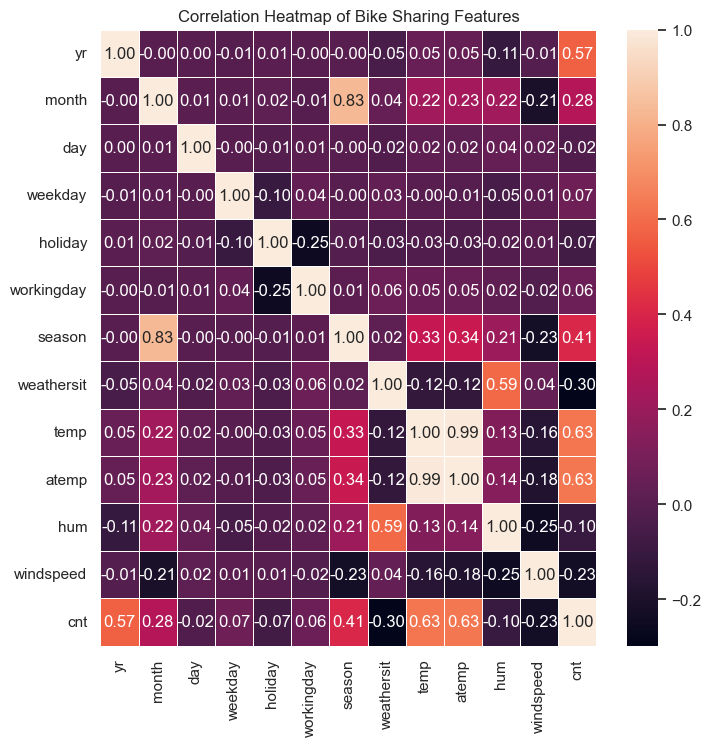

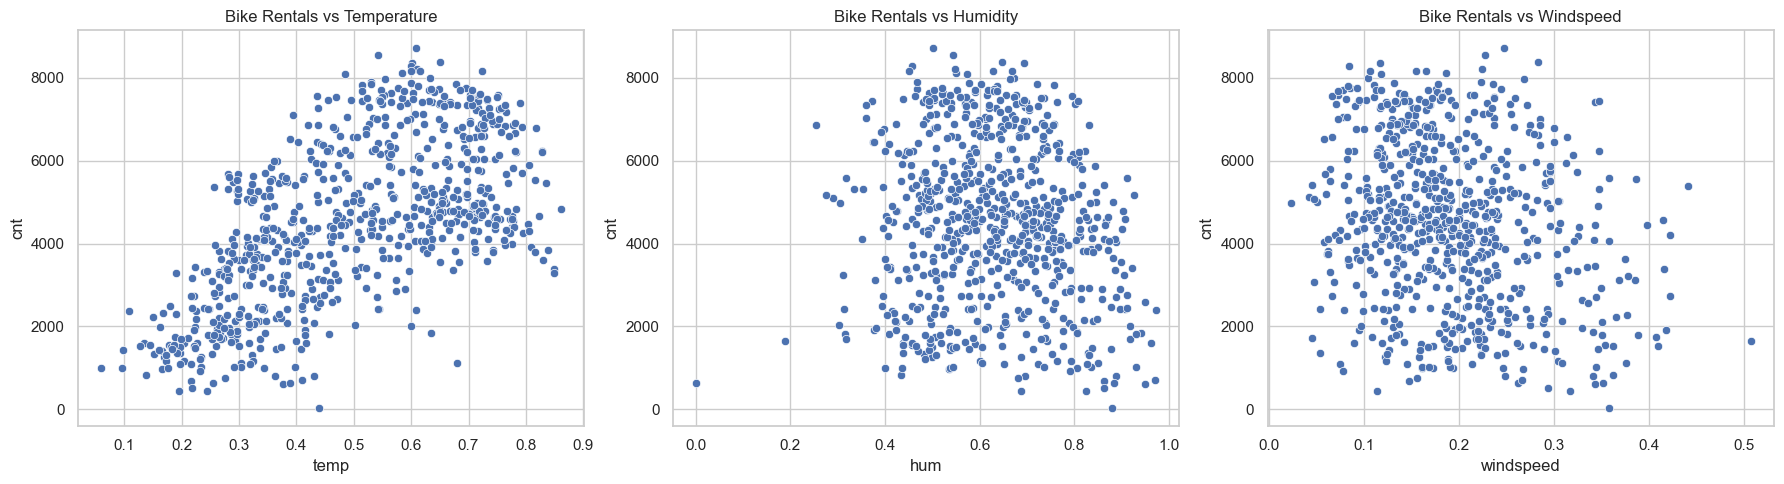

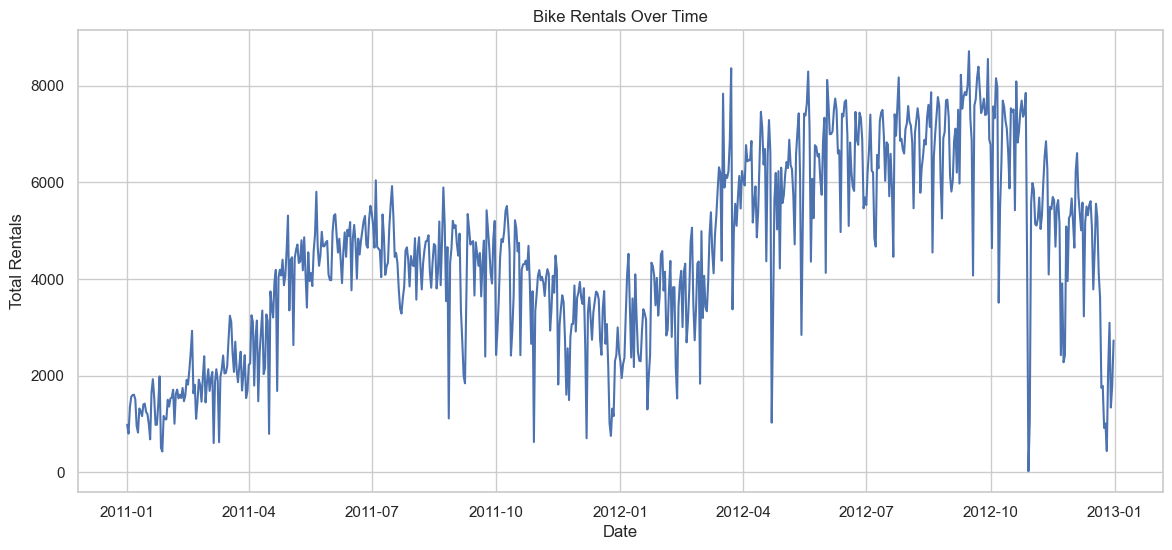

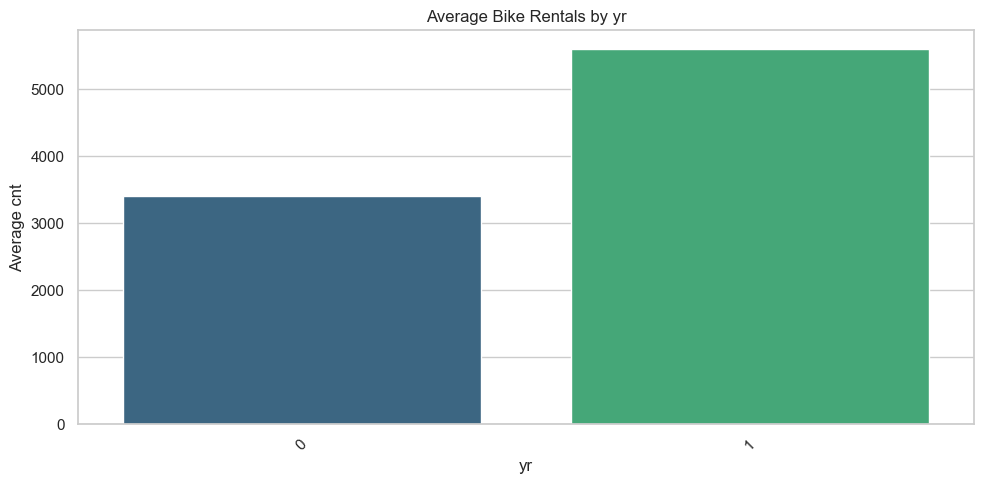

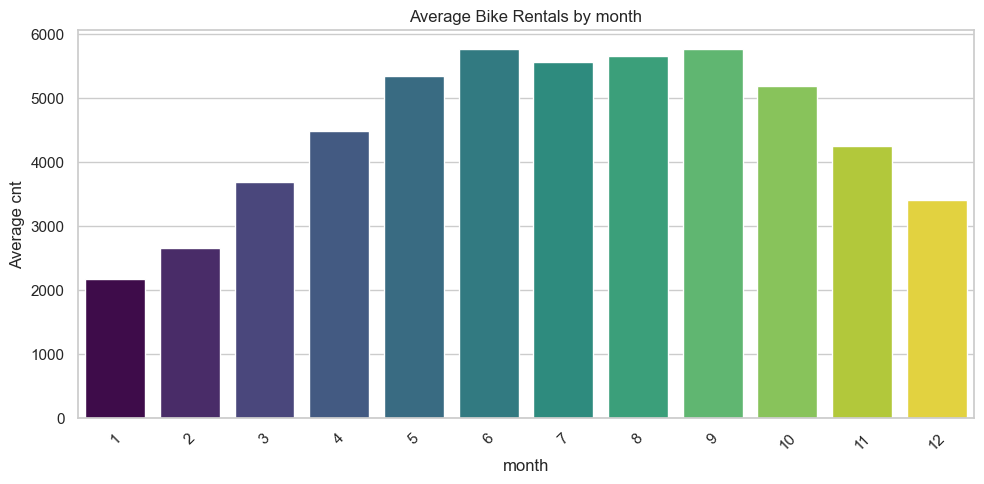

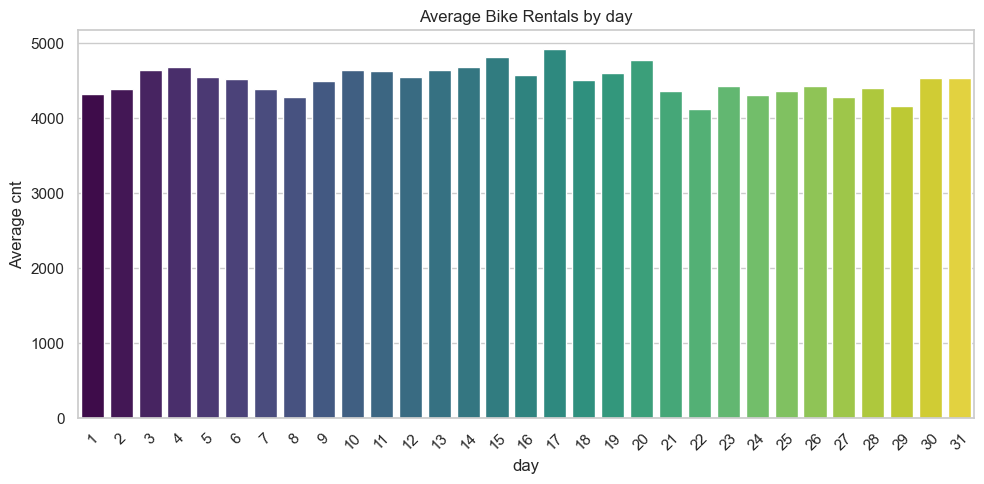

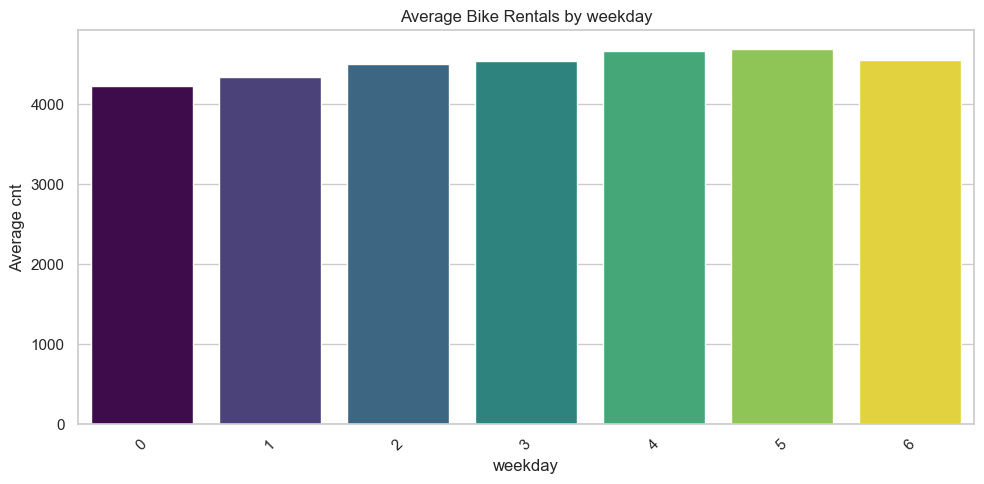

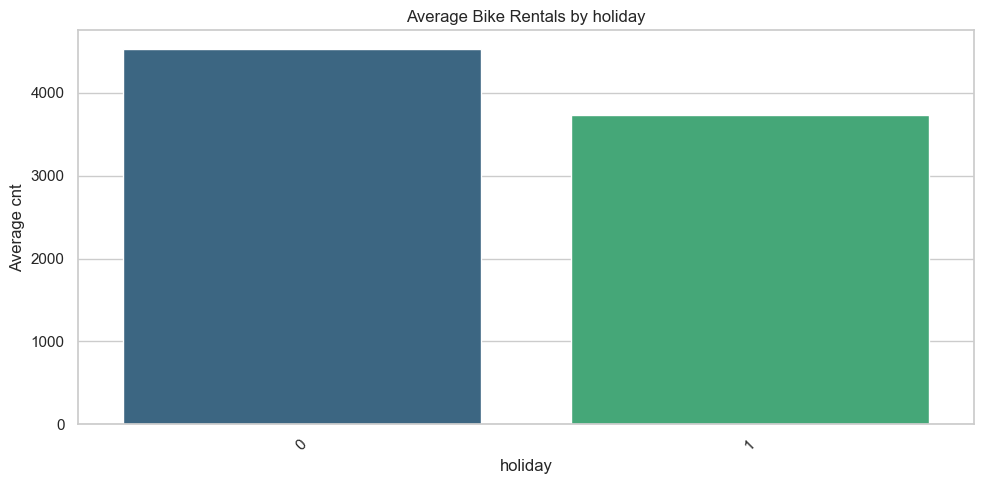

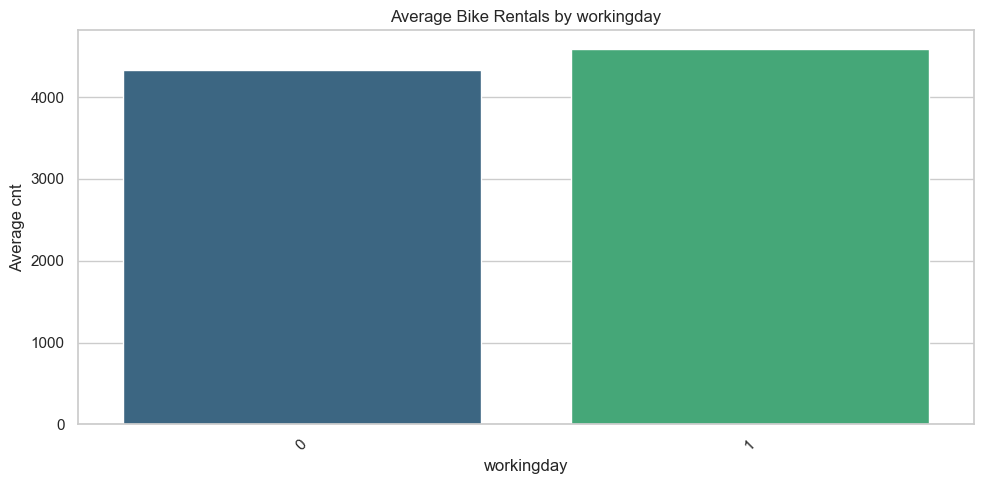

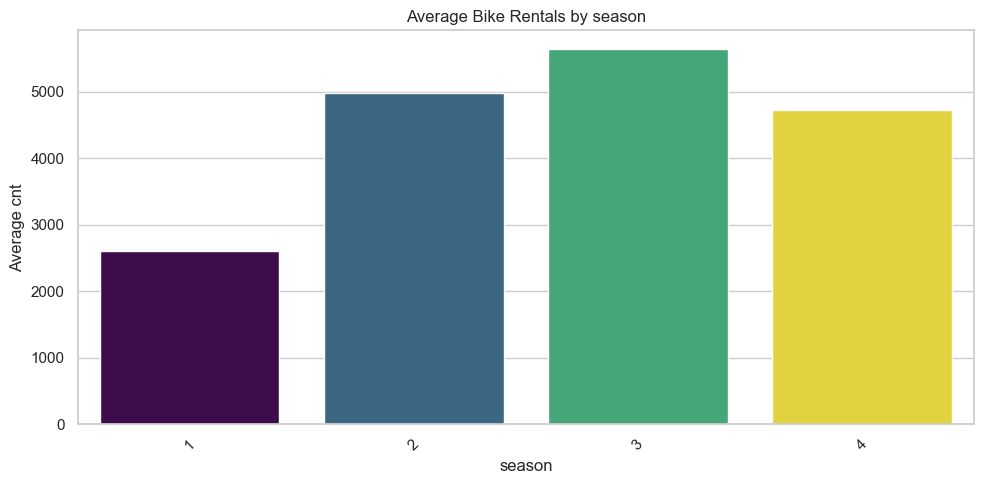

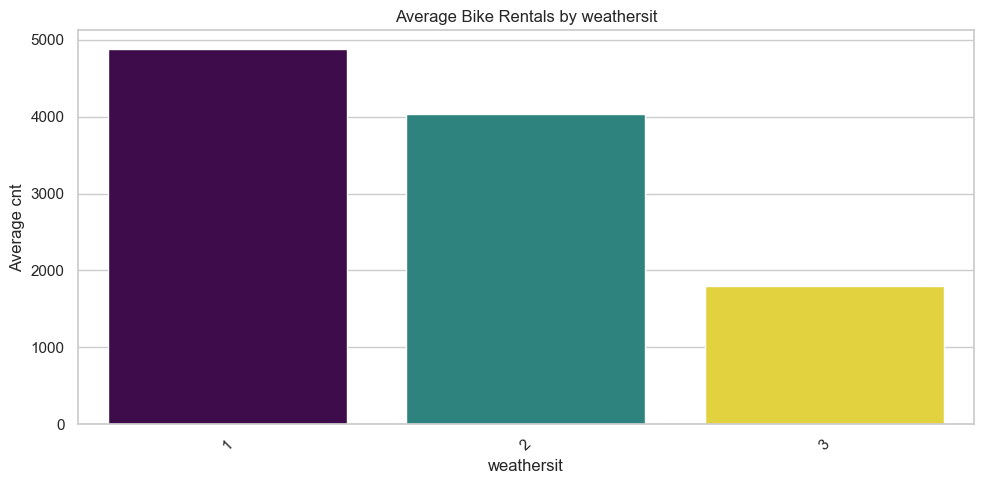

In [53]:
# ------------ Heatmap ----------------------------------------------------------------------------------------------
plt.figure(figsize=(8,8))
sns.heatmap(df_basic.drop('full_date', axis = 1).corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Bike Sharing Features")
plt.show()


# ------------ Scatter Plots ----------------------------------------------------------------------------------------------
fig, axs = plt.subplots(1,3, figsize=(18, 5))

sns.scatterplot(data=df_basic, x='temp', y='cnt', ax=axs[0])
axs[0].set_title("Bike Rentals vs Temperature")

sns.scatterplot(data=df_basic, x='hum', y='cnt', ax=axs[1])
axs[1].set_title("Bike Rentals vs Humidity")

sns.scatterplot(data=df_basic, x='windspeed', y='cnt', ax=axs[2])
axs[2].set_title("Bike Rentals vs Windspeed")

plt.tight_layout()
plt.show()


# ------------ Line Plot ----------------------------------------------------------------------------------------------
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_basic, x='full_date', y='cnt')
plt.title("Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.show()


# ------------ Bar Plots ----------------------------------------------------------------------------------------------
plt.rcParams['figure.figsize'] = (10, 5)

group_cols = ['yr', 'month', 'day', 'weekday', 'holiday', 'workingday', 'season', 'weathersit']


for col in group_cols:
    plt.figure()
    sns.barplot(x=col, y='cnt', data=df_basic, estimator=np.mean, errorbar=None, palette="viridis", hue=col, legend = False)
    plt.title(f'Average Bike Rentals by {col}')
    plt.ylabel('Average cnt')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## *Interpretation*: 
- Heatmap shows that cnt is positively correlated with
    - temp
    - atemp
    - yr
    - season
    - month
- Negatively correlated with
    - hum
    - windspeed
    - weathersit

- Scatter plots show
    - People rent more bikes on warm days
    - Humidity vs. Rentals: No strong visible pattern — might not be useful alone.
    - high winds reduce rentals.

- 2012 has higher average rentals than 2011 (not useful)
- Rentals peak in summer (May to September), and drop in winter. Strong seasonal effect.
- Day of month doesn’t matter much
- Rentals slighly higher on weekdays, but mostly stable
- Fewer rentals on holidays - could be due to offices being closed
- Summer and fall see most activity, with winter being the least, hence season is a strong feature
- Weather also impacts rentals, clear days have most rentals while light rain/snow have least

## **5. Feature Engineering and One-Hot encoding**

Feature engineering is the process of selecting, modifying or creating new features from the raw data to improve the model's performance

Good features -> better predictions

One-Hot encoding means converting categorical variables into binary columns (0,1)

Solves the problem : season 4 is not 4 times as important as season 1

In [73]:
# Columns that are categorical (nominal)
categorical_cols = ['season', 'weathersit', 'month', 'weekday']

# Using pandas' get_dummies for simplicity
df_encoded = pd.get_dummies(df_basic, columns = categorical_cols, drop_first=True)

In [74]:
df_encoded.head()

,full_date,yr,day,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01,0,1,0,0,0.344167,0.363625,0.805833,0.160446,985,...,False,False,False,False,False,False,False,False,False,True
1,2011-01-02,0,2,0,0,0.363478,0.353739,0.696087,0.248539,801,...,False,False,False,False,False,False,False,False,False,False
2,2011-01-03,0,3,0,1,0.196364,0.189405,0.437273,0.248309,1349,...,False,False,False,False,True,False,False,False,False,False
3,2011-01-04,0,4,0,1,0.200000,0.212122,0.590435,0.160296,1562,...,False,False,False,False,False,True,False,False,False,False
4,2011-01-05,0,5,0,1,0.226957,0.229270,0.436957,0.186900,1600,...,False,False,False,False,False,False,True,False,False,False


In [75]:
# Creating Interaction terms

# temp × hum — heat + humidity may reduce bike usage
df_encoded['temp_x_hum'] = df_encoded['temp'] * df_encoded['hum']

# temp × windspeed — hot and windy weather might affect usage
df_encoded['temp_x_wind'] = df_encoded['temp'] * df_encoded['windspeed']

# workingday × temp — high temperature might impact workday rentals
df_encoded['workingday_x_temp'] = df_encoded['workingday'] * df_encoded['temp']

# season_2 (spring) × holiday — fewer rides on spring holidays?
if 'season_2' in df_encoded.columns:
    df_encoded['spring_x_holiday'] = df_encoded['season_2'] * df_encoded['holiday']

# year × temp — weather trend over years
df_encoded['yr_x_temp'] = df_encoded['yr'] * df_encoded['temp']

In [76]:
# Dropping atemp since it is nearly collinear with temp
df_encoded.drop(columns=['atemp'], inplace=True)

print("Final Shape after Feature Engineering:", df_encoded.shape)
df_encoded.head()

Final Shape after Feature Engineering: (731, 36)


,full_date,yr,day,holiday,workingday,temp,hum,windspeed,cnt,season_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,temp_x_hum,temp_x_wind,workingday_x_temp,spring_x_holiday,yr_x_temp
0,2011-01-01,0,1,0,0,0.344167,0.805833,0.160446,985,False,...,False,False,False,False,True,0.277341,0.055220,0.000000,0,0.0
1,2011-01-02,0,2,0,0,0.363478,0.696087,0.248539,801,False,...,False,False,False,False,False,0.253012,0.090338,0.000000,0,0.0
2,2011-01-03,0,3,0,1,0.196364,0.437273,0.248309,1349,False,...,False,False,False,False,False,0.085865,0.048759,0.196364,0,0.0
3,2011-01-04,0,4,0,1,0.200000,0.590435,0.160296,1562,False,...,True,False,False,False,False,0.118087,0.032059,0.200000,0,0.0
4,2011-01-05,0,5,0,1,0.226957,0.436957,0.186900,1600,False,...,False,True,False,False,False,0.099170,0.042418,0.226957,0,0.0


## **6. Model Preparation**

In [78]:
# 6.1 Spliting featues and target
df_encoded = df_encoded.drop(columns=['full_date'])

X = df_encoded.drop(columns='cnt')
y = df_encoded['cnt']

In [79]:
# 6.2 Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# 6.3 Standardization (Feature scaling)
# x - mean / std

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# 6.4 Train a Linear Regression Model

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

y_pred = lr.predict

## **7. Model Evaluation**

In [85]:
# 7.1 Evaluating the model

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R² Score: 0.850
RMSE: 775.15
MAE: 552.43


R2 Score: 0.850 - Model explains 85% of the variance in bike rentals.

RMSE: 775.15 - On average, predictions deviate by about 775 rentals, which is acceptable given peak values go up to 9000.

MAE: 552.43 - The average error is just over 550 rentals, indicating low bias and good generalization.

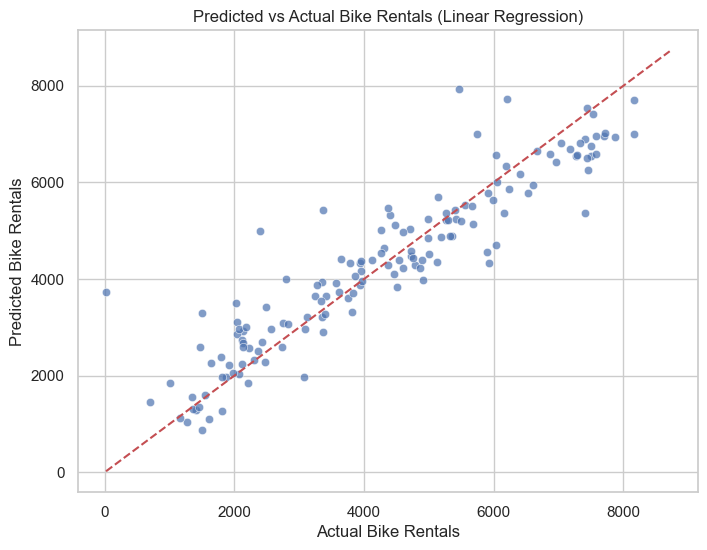

In [86]:
# 7.2 Scatter Plot : Actual vs Predicted

plt.figure(figsize = (8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha = 0.7)
plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.title("Predicted vs Actual Bike Rentals (Linear Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

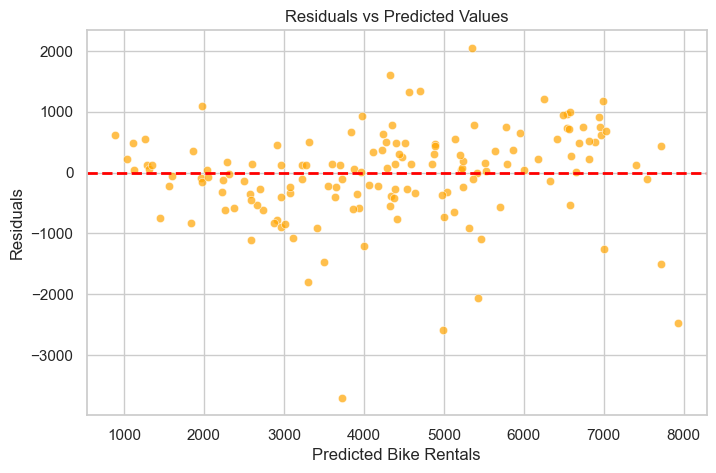

In [88]:
# 7.3 Residual plot analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Bike Rentals')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



Residuals are spread around 0, which means predictions are not consistenly over or underestiating

              Feature  Coefficient
4                temp   907.797126
9            season_4   693.421556
0                  yr   670.515720
7            season_2   401.420670
33          yr_x_temp   356.744865
8            season_3   326.407498
3          workingday   260.674667
19            month_9   243.602813
28          weekday_6   167.656815
15            month_5   156.995445
13            month_3   137.844784
20           month_10   115.618427
30        temp_x_wind   112.991909
27          weekday_5    95.474892
16            month_6    84.971488
14            month_4    83.152610
25          weekday_3    81.007341
26          weekday_4    72.908461
18            month_8    49.337905
24          weekday_2    44.565868
23          weekday_1    39.808793
12            month_2    24.343067
32   spring_x_holiday   -18.748178
1                 day   -35.477390
22           month_12   -44.534697
2             holiday   -46.569896
21           month_11   -47.193267
17            month_

C:\Users\Aditya Jaiman\AppData\Local\Temp\ipykernel_4708\868502382.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


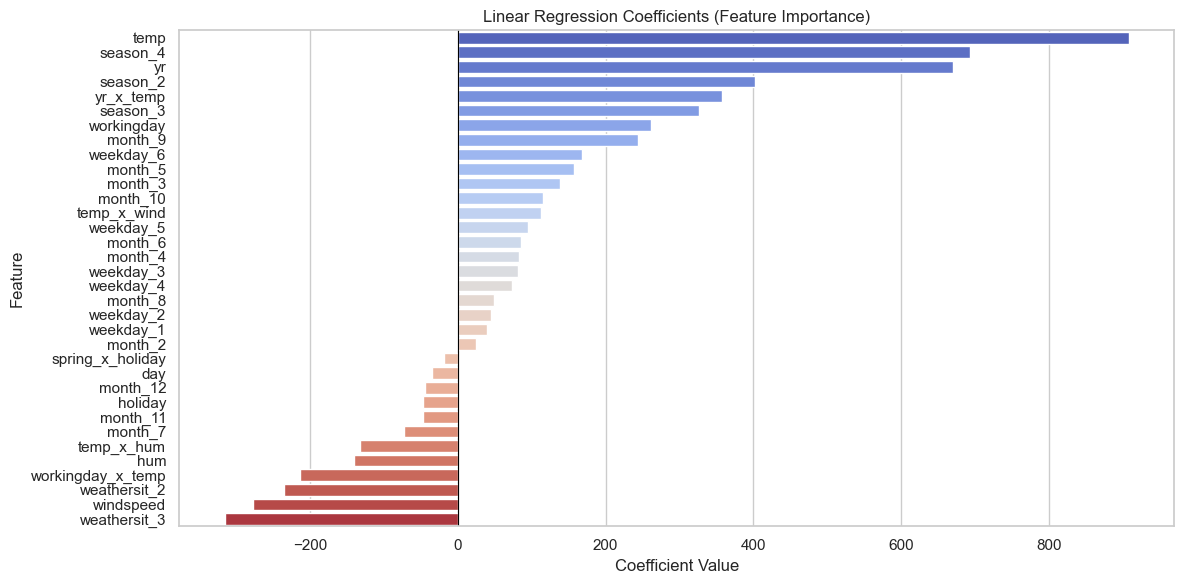

In [90]:
# 7.4 Coefficients Analysis
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display top coefficients
print(coef_df)

# Plot Coefficients
plt.figure(figsize=(12, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Linear Regression Coefficients (Feature Importance)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()